<a href="https://colab.research.google.com/github/NaganoZemi/A_Team/blob/main/vavant_home_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#各分析に必要なライブラリを読み込む

(47, 28)


,birthrate,emirate,mariirate,total_area,habit_area,Annu_ave_temp,Annu_snow_day,productivity_land,ship_value_goods,ship_values_goods_oneman,...,D310411,D3203086,H1616,K4201,L3130,H06406,J022011,J02205,K04101,H01405
0,1.27,1.09,4.34,834.24,28.5,9.5,131,110.0,3774.7,3459.2,...,220791,66418069,125000,25459,457545,96.1,89.4,22.2,187.9,13.5
1,1.43,1.88,3.75,96.46,33.5,11.0,117,213.4,3136.0,2780.0,...,8994,7153410,52600,4060,383704,93.9,136.9,23.3,234.8,15.0
2,1.41,1.78,3.58,152.75,24.3,11.0,106,181.7,3146.9,2791.6,...,584583,20974380,61300,3458,472114,91.5,86.6,29.3,159.7,16.1
3,1.30,2.13,4.46,72.82,43.3,13.6,63,152.8,3981.6,4174.2,...,1628622,50431709,62200,13755,377797,99.1,61.1,24.3,294.3,12.0
4,1.33,1.57,3.11,116.38,27.5,12.3,101,124.9,2120.0,2596.2,...,0,3459146,51100,2460,482684,97.6,78.7,34.2,181.9,13.6


In [ ]:
df = pd.read_excel('AtoH_2018fin.xlsx')
#ここでは空き家の分析を行っているため空き家に関するデータを用いている
#データは国が公開してるオープンデータであるe-statを用いた
#e-statには様々な統計指標があるため、自分でAI（テーブルデータ分析）を学ぶ際に非常に参考になるデータである
print(df.shape)
df.head()

In [ ]:
df.isnull().sum()
#欠損値が各変数にないかを確認している

birthrate                   0
emirate                     0
mariirate                   0
total_area                  0
habit_area                  0
Annu_ave_temp               0
Annu_snow_day               0
productivity_land           0
ship_value_goods            0
ship_values_goods_oneman    0
deposit                     0
ac_balance_ratio            0
E0110101                    0
E0110102                    0
E0110103                    0
G01101                      0
G01104                      0
A1306                       0
D310411                     0
D3203086                    0
H1616                       0
K4201                       0
L3130                       0
H06406                      0
J022011                     0
J02205                      0
K04101                      0
H01405                      0
fold                        0
dtype: int64

In [ ]:
df.shape
#行と列

(47, 29)

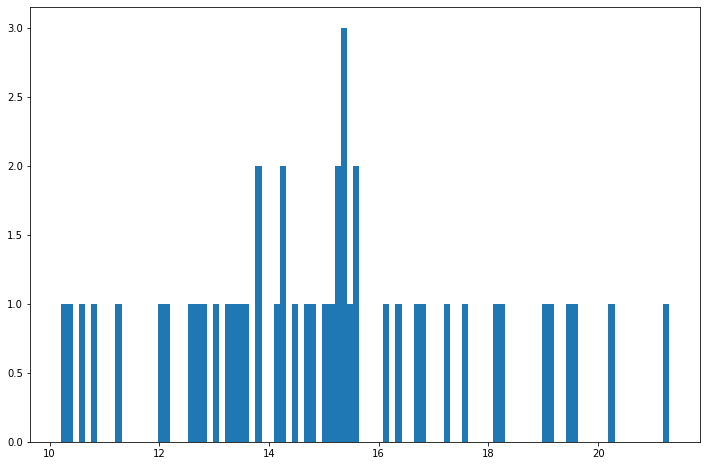

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['H01405'], bins = 100)
plt.show()
#ここでは、分散の度合いを一つの変数について観測できるよう図表化している
#変数を変えれば他のも見れる

In [ ]:
df.describe()
#ここでは各変数の大まかな統計量について観測している

,birthrate,emirate,mariirate,total_area,habit_area,Annu_ave_temp,Annu_snow_day,productivity_land,ship_value_goods,ship_values_goods_oneman,...,D3203086,H1616,K4201,L3130,H06406,J022011,J02205,K04101,H01405,fold
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000,47.00000,47.000000,47.000000,47.000000,...,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1.503404,1.885957,4.283404,80.420426,37.30000,16.029787,35.12766,250.202128,3939.668085,3007.514894,...,1.362474e+07,97121.276596,17390.170213,455500.234043,97.819149,81.068085,25.329787,332.114894,15.021277,1.936170
std,0.138239,0.297377,0.483391,116.948054,14.93349,2.296492,33.20792,97.066697,1224.340952,863.966599,...,1.570876e+07,74340.886217,23847.834214,46419.102206,1.871948,30.778847,4.678996,152.064230,2.684977,1.435637
min,1.200000,1.090000,3.110000,18.770000,16.40000,9.500000,0.00000,110.000000,1914.500000,1991.700000,...,2.106321e+06,31000.000000,2110.000000,355137.000000,91.500000,42.100000,14.700000,150.400000,10.200000,0.000000
25%,1.420000,1.710000,4.015000,41.665000,25.70000,15.300000,13.00000,185.350000,3064.150000,2592.850000,...,3.847698e+06,51850.000000,4091.500000,432661.500000,96.850000,59.900000,23.000000,239.950000,13.350000,1.000000
50%,1.520000,1.880000,4.240000,60.970000,33.10000,16.800000,20.00000,233.000000,3566.300000,2780.000000,...,6.842161e+06,74800.000000,7967.000000,454000.000000,98.300000,73.700000,24.700000,292.700000,15.000000,2.000000
75%,1.560000,2.080000,4.450000,80.890000,44.95000,17.250000,53.50000,323.200000,4645.950000,3122.850000,...,1.357755e+07,107800.000000,15566.000000,487821.500000,99.200000,92.350000,28.600000,371.550000,16.550000,3.000000
max,1.890000,2.750000,5.980000,834.240000,69.80000,23.500000,131.00000,516.400000,7201.400000,7496.500000,...,6.641807e+07,380800.000000,114492.000000,535451.000000,100.000000,180.400000,40.300000,776.200000,21.300000,4.000000


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
df["fold"] = -1
for fold, (train_idx, valid_idx) in enumerate(kf.split(df)):
    df.loc[valid_idx, "fold"] = fold
print(df["fold"].value_counts())
#機械学習の準備をしている
#データを5等分にしている

0    10
1    10
3     9
4     9
2     9
Name: fold, dtype: int64


In [ ]:
fold = 0
train = df.loc[df["fold"] != fold].copy()
valid = df.loc[df["fold"] == fold].copy()
print(train.shape, valid.shape)
#学習用と検証用に分けている

(37, 29) (10, 29)


In [ ]:
feat_cols = train.drop(columns = ["fold","H01405"]).columns.tolist()
print(feat_cols)

X_train = train[feat_cols]
X_valid = valid[feat_cols]
y_train = train["H01405"]
y_valid = valid["H01405"]
#"H01405"==空家率　
#これをデータの説明変数から分けている

['birthrate', 'emirate', 'mariirate', 'total_area', 'habit_area', 'Annu_ave_temp', 'Annu_snow_day', 'productivity_land', 'ship_value_goods', 'ship_values_goods_oneman', 'deposit', 'ac_balance_ratio', 'E0110101', 'E0110102', 'E0110103', 'G01101', 'G01104', 'A1306', 'D310411', 'D3203086', 'H1616', 'K4201', 'L3130', 'H06406', 'J022011', 'J02205', 'K04101']


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
#XGboostを行うためのライブラリを読み込む

In [ ]:
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_valid, y_valid)
#XGboost用の行列を用意している

In [ ]:
params = {
    "objective" : "reg:squarederror",
    "eval_metric" : "rmse",
    "learning_rate" : 0.008,
    'max_depth': 17
}
#"reg:squarederror"回帰モデルの分析をする際に使う、二値分類になると変わる

In [ ]:
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dvalid, "valid")],
    num_boost_round = 1000
)


In [ ]:
pred = model.predict(xgb.DMatrix(X_valid))
print(pred)

[17.343727  16.135141  12.025813  13.178171  16.98312   15.201018
 14.177564  13.8975115 14.562454  14.589163 ]


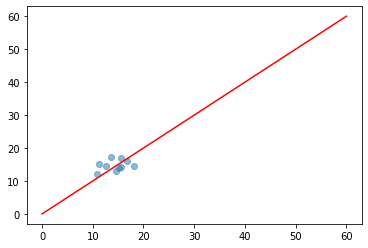

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_valid, pred, alpha = 0.5)
plt.plot(np.linspace(0, 60, 100), np.linspace(0, 60, 100), "red")
plt.show()
#横軸を正解データ、縦軸を予測値

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid, pred)
rmse = np.sqrt(mse)
print(rmse)
#平均二乗誤差の平方根(RMSE)

2.3295459244810597


In [ ]:
xgb = XGBRegressor(**params)

In [ ]:
plot_importance(xgb)